In [146]:
import pandas as pd
import requests
from fake_useragent import UserAgent
from bs4 import BeautifulSoup

# Scrapping websites

In [147]:
#we are using fake user agent for scrapping purpose and we can also use proxy.
ua=UserAgent()
ua.ie

'Mozilla/1.22 (compatible; MSIE 10.0; Windows 3.1)'

In [148]:
header={'User-Agent': ua.ie}
PROXY = {"https": "https//88.208.229.43:80"}
search_keyword="top+smartphones"

In [149]:
base_url="https://www.amazon.in/s?k="
url=base_url+search_keyword

In [150]:
search_response=requests.get(url,headers=header)#proxies=PROXY)

In [151]:
#function for search keyword

cookie={}
def getAmazonSearch(search_keyword):
    url="https://www.amazon.in/s?k="+search_keyword
    print(url)
    page=requests.get(url,cookies=cookie,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

In [152]:
#function for getting single items from search_keyword pages

def Searchasin(asin):
    url="https://www.amazon.in/dp/"+asin
    print(url)
    page=requests.get(url,cookies=cookie,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

In [153]:
#function for review scrapping

def Searchreviews(review_link):
    url="https://www.amazon.in"+review_link
    print(url)
    page=requests.get(url,cookies=cookie,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

In [277]:
cookie

{}

In [154]:
#Scrapping Product names

product_names=[]
response=getAmazonSearch(search_keyword)
soup=BeautifulSoup(response.content)
for i in soup.findAll("span",attrs={'class':'a-size-medium a-color-base a-text-normal'}): # the tag which is getting from source page
    product_names.append(i.text) 

https://www.amazon.in/s?k=top+smartphones


In [156]:
print(len(product_names))
product_names

16


['Meizu C9 (Gold, 2GB RAM, 16GB Storage)',
 'Redmi Note 8 (Moonlight White, 4GB RAM, 64GB Storage)',
 'Redmi Note 8 (Cosmic Purple, 4GB RAM, 64GB Storage)',
 'OPPO A5 2020 (Dazzling White, 3GB RAM, 64GB Storage) with No Cost EMI/Additional Exchange Offers',
 'Redmi Note 8 (Neptune Blue, 4GB RAM, 64GB Storage)',
 'OPPO A5 2020 (Dazzling White, 4GB RAM, 64GB Storage) with No Cost EMI/Additional Exchange Offers',
 'OPPO A12 (Blue, 3GB RAM, 32GB Storage) with No Cost EMI/Additional Exchange Offers',
 'Apple iPhone 11 (64GB) - Black',
 'Apple iPhone 11 (128GB) - Black',
 'Samsung Galaxy M31 (Space Black, 6GB RAM, 128GB Storage)',
 'Samsung Galaxy M01 (Blue, 3GB RAM, 32GB Storage) with No Cost EMI/Additional Exchange Offers',
 'OPPO F11 (Fluorite Purple, 6GB RAM, 128GB Storage) with No Cost EMI/Additional Exchange Offers',
 'OnePlus 7T Pro (Haze Blue, 8GB RAM, Fluid AMOLED Display, 256GB Storage, 4085mAH Battery)',
 'OnePlus 7T (Glacier Blue, 8GB RAM, Fluid AMOLED Display, 256GB Storage, 380

In [157]:
#Getting Amazon Standard Identification Number(asin) from source page

data_asin=[]
response=getAmazonSearch(search_keyword)
soup=BeautifulSoup(response.content)
for i in soup.findAll("div",attrs={'class':"sg-col-20-of-24 s-result-item s-asin sg-col-0-of-12 sg-col-28-of-32 sg-col-16-of-20 sg-col sg-col-32-of-36 sg-col-12-of-16 sg-col-24-of-28"}):
    data_asin.append(i['data-asin'])

https://www.amazon.in/s?k=top+smartphones


In [278]:
data_asin

['B07VVDRSZ4',
 'B077PW9ZQL',
 'B07SDPTP6Q',
 'B07ZNPQ21G',
 'B07X1KT1FJ',
 'B07SDPJ4XJ',
 'B07X3P1N2V',
 'B07X1KT6LD',
 'B07ZP6L8HQ',
 'B07X1KT6LF',
 'B07PSHDTHB',
 'B07X4PKGSN',
 'B07KXCKPZZ',
 'B07HGJ7WLM',
 'B086KCDGTQ',
 'B07HGN617M']

In [159]:
#getting a product link from asin(Amazon Standard Identification Number) and review link

link=[]
for i in range(len(data_asin)):
    response=Searchasin(data_asin[i])
    soup=BeautifulSoup(response.content)
    for i,j in zip(soup.findAll("a",{'data-hook':"see-all-reviews-link-foot"}),range(len(data_asin))):
        if j==0:
            link.append(i['href'])

https://www.amazon.in/dp/B07VVDRSZ4
https://www.amazon.in/dp/B077PW9ZQL
https://www.amazon.in/dp/B07SDPTP6Q
https://www.amazon.in/dp/B07ZNPQ21G
https://www.amazon.in/dp/B07X1KT1FJ
https://www.amazon.in/dp/B07SDPJ4XJ
https://www.amazon.in/dp/B07X3P1N2V
https://www.amazon.in/dp/B07X1KT6LD
https://www.amazon.in/dp/B07ZP6L8HQ
https://www.amazon.in/dp/B07X1KT6LF
https://www.amazon.in/dp/B07PSHDTHB
https://www.amazon.in/dp/B07X4PKGSN
https://www.amazon.in/dp/B07KXCKPZZ
https://www.amazon.in/dp/B07HGJ7WLM
https://www.amazon.in/dp/B086KCDGTQ
https://www.amazon.in/dp/B07HGN617M


In [160]:
print(len(link))
link

16


['/Redmi-K20-Glacier-Blue-Storage/product-reviews/B07VVDRSZ4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Meizu-C9-Gold-16GB-Storage/product-reviews/B077PW9ZQL/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Dazzling-Storage-Additional-Exchange-Offers/product-reviews/B07SDPTP6Q/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Nillkin-Luxury-Leather-Flipcover-OnePlus/product-reviews/B07ZNPQ21G/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Redmi-Note-Moonlight-White-Storage/product-reviews/B07X1KT1FJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Dazzling-Storage-Additional-Exchange-Offers/product-reviews/B07SDPJ4XJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Redmi-Note-Cosmic-Purple-Storage/product-reviews/B07X3P1N2V/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Redmi-Note-Neptune-Blue-Storage/product-reviews/B07X1KT6LD/ref=cm_cr_dp_d_show_all_btm?ie=U

In [161]:
#Now we have the all review links. In this code we are scraping first 5 pages reviews of each products but we can also scrap more reviews

product=[]
reviews=[]
for j in range(len(link)):
    for k in range(1,6):
        response=Searchreviews(link[j]+'&pageNumber='+str(k))
        soup=BeautifulSoup(response.content)
        for i in soup.findAll("span",{'data-hook':"review-body"}):
            product.append(product_names[j])
            reviews.append(i.text)

https://www.amazon.in/Redmi-K20-Glacier-Blue-Storage/product-reviews/B07VVDRSZ4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/Redmi-K20-Glacier-Blue-Storage/product-reviews/B07VVDRSZ4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/Redmi-K20-Glacier-Blue-Storage/product-reviews/B07VVDRSZ4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/Redmi-K20-Glacier-Blue-Storage/product-reviews/B07VVDRSZ4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.in/Redmi-K20-Glacier-Blue-Storage/product-reviews/B07VVDRSZ4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.in/Meizu-C9-Gold-16GB-Storage/product-reviews/B077PW9ZQL/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/Meizu-C9-Gold-16GB-Storage/product-reviews/B077PW9ZQL/ref=

https://www.amazon.in/Vivo-Storage-Additional-Exchange-Offers/product-reviews/B07PSHDTHB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/Vivo-Storage-Additional-Exchange-Offers/product-reviews/B07PSHDTHB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.in/Vivo-Storage-Additional-Exchange-Offers/product-reviews/B07PSHDTHB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.in/Redmi-Note-Pro-Storage-Processor/product-reviews/B07X4PKGSN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/Redmi-Note-Pro-Storage-Processor/product-reviews/B07X4PKGSN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/Redmi-Note-Pro-Storage-Processor/product-reviews/B07X4PKGSN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/Redmi-Note-Pro-Storag

In [162]:
len(reviews)

719

In [163]:
reviews

['\n\n  in this rate mobile facilities is poor..cemera 48 mp result very bad.. portrait mode cemera results very nice and selfi cemera after you using long that pop up cemera hanging its not working properly..evan network connectivity results also bad in this price...its better in this price buy appo yah vivo atlist that phone is giving best facilities in this price.\n\n',
 "\n\n  Don't buy this phone bc no memory card solt 64 gb is very low for feature\n\n",
 '\n\n  Good\n\n',
 '\n\n  1)The battery is good. after 5 hours of sot and normal usage it is 50 % at night.2)Device body is completely glass. It will not have corrosion or discoloration issue. But it might break if dropped. Use a good case.3) Performance is good i have around 142 apps installed. Around 45 apps stay in memory the device still shows 1.5 Gb available ram and is very smooth.4) No memory card is available. However large memory phones are not required anymore due to better cloud storage and network speeds . 64 Gb is mo

In [164]:
len(product)

719

In [191]:
#Converting product name into dictonary
reviews_dict={'product_name':product}#,'reviews':reviews}

In [192]:
reviews_dict

{'product_name': ['Meizu C9 (Gold, 2GB RAM, 16GB Storage)',
  'Meizu C9 (Gold, 2GB RAM, 16GB Storage)',
  'Meizu C9 (Gold, 2GB RAM, 16GB Storage)',
  'Meizu C9 (Gold, 2GB RAM, 16GB Storage)',
  'Meizu C9 (Gold, 2GB RAM, 16GB Storage)',
  'Meizu C9 (Gold, 2GB RAM, 16GB Storage)',
  'Meizu C9 (Gold, 2GB RAM, 16GB Storage)',
  'Meizu C9 (Gold, 2GB RAM, 16GB Storage)',
  'Meizu C9 (Gold, 2GB RAM, 16GB Storage)',
  'Meizu C9 (Gold, 2GB RAM, 16GB Storage)',
  'Meizu C9 (Gold, 2GB RAM, 16GB Storage)',
  'Meizu C9 (Gold, 2GB RAM, 16GB Storage)',
  'Meizu C9 (Gold, 2GB RAM, 16GB Storage)',
  'Meizu C9 (Gold, 2GB RAM, 16GB Storage)',
  'Meizu C9 (Gold, 2GB RAM, 16GB Storage)',
  'Meizu C9 (Gold, 2GB RAM, 16GB Storage)',
  'Meizu C9 (Gold, 2GB RAM, 16GB Storage)',
  'Meizu C9 (Gold, 2GB RAM, 16GB Storage)',
  'Meizu C9 (Gold, 2GB RAM, 16GB Storage)',
  'Meizu C9 (Gold, 2GB RAM, 16GB Storage)',
  'Meizu C9 (Gold, 2GB RAM, 16GB Storage)',
  'Meizu C9 (Gold, 2GB RAM, 16GB Storage)',
  'Meizu C9 (Gol

In [195]:
#Converting dictonary into dataframe

review_df=pd.DataFrame(data=reviews_dict)
review_df['product_reviews']=reviews

In [194]:
review_df

,product_name,product_reviews
0,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",\n\n in this rate mobile facilities is poor.....
1,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",\n\n Don't buy this phone bc no memory card s...
2,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",\n\n Good\n\n
3,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",\n\n 1)The battery is good. after 5 hours of ...
4,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",\n\n Realized a few things the hard way:1. An...
5,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",\n\n Great value products\n\n
6,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",\n\n Thumbs up to - Amazing Audio Performance...
7,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",\n\n Premium quality smartphone on a budget.P...
8,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",\n\n Very bad products. Don't buy guys. Don't...
9,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)","\n\n Great phone. Smooth, elequant, good perf..."


In [279]:
# saving dataframe into csv file

review_df.to_csv(r'amzaon_phone_reviews.csv',index=False)

In [ ]:
Creating model f

In [197]:
import string
import re

In [202]:
from spacy.lang.en.stop_words import STOP_WORDS
punc=string.punctuation
stop_word=list(STOP_WORDS)
import spacy

In [199]:
data=pd.read_csv(r'amzaon_phone_reviews.csv')
data.head()

,product_name,product_reviews
0,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",\n\n in this rate mobile facilities is poor.....
1,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",\n\n Don't buy this phone bc no memory card s...
2,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",\n\n Good\n\n
3,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",\n\n 1)The battery is good. after 5 hours of ...
4,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",\n\n Realized a few things the hard way:1. An...


In [200]:
data['product_reviews']=data['product_reviews'].apply(lambda x:x.replace('\n\n',''))

In [201]:
data.head()

,product_name,product_reviews
0,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",in this rate mobile facilities is poor..ceme...
1,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",Don't buy this phone bc no memory card solt ...
2,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",Good
3,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",1)The battery is good. after 5 hours of sot ...
4,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",Realized a few things the hard way:1. Antutu...


In [203]:
#creating function for review cleaning

nlp = spacy.load('en_core_web_sm')
def remove_emojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

def text_cleaning(sentence):
    doc=nlp(sentence)

    tokens=[]

    for i in doc:
        if i.lemma_ != '-PRON-':
            temp=i.lemma_.lower().strip()
        else:
            temp=i.lower_
        temp=re.sub(r'[^a-zA_Z0-9]','',temp)
        tokens.append(temp)
    
    clear_text=[]
    for token in tokens:
        if token not in stop_word and token not in punc:
            if token not in clear_text:
                clear_text.append(token)
    clear_text=' '.join(clear_text)
            
    return clear_text
    

In [205]:
#cleaning reviews

data['clean_reviews']=data['product_reviews'].apply(lambda x:remove_emojify(x))
data['clean_reviews']=data['clean_reviews'].apply(lambda x:text_cleaning(x))

In [206]:
data.head()

,product_name,product_reviews,clean_reviews
0,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",in this rate mobile facilities is poor..ceme...,rate mobile facility poor cemera 48 mp result ...
1,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",Don't buy this phone bc no memory card solt ...,buy phone bc memory card solt 64 gb low feature
2,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",Good,good
3,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",1)The battery is good. after 5 hours of sot ...,1the battery good 5 hour sot normal usage 50 n...
4,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",Realized a few things the hard way:1. Antutu...,realize thing hard way1 antutu banchmark user ...


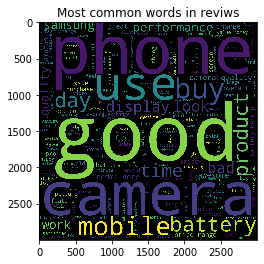

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

wordcloud=WordCloud(width=3000,height=3000)
wordcloud=wordcloud.generate(' '.join(data['clean_reviews'].tolist()))
plt.title('Most common words in reviews')
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [219]:
#creating functions for sentiment score

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()

def sentiment_score(sentence):
    score=analyzer.polarity_scores(sentence)
    return score

def compound_score(text):
    comp=sentiment_score(text)
    return comp['compound']


In [223]:
data['sentiment_score']=data['clean_reviews'].apply(lambda x: compound_score(x))

In [225]:
data.head(20)

,product_name,product_reviews,clean_reviews,sentiment_score
0,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",in this rate mobile facilities is poor..ceme...,rate mobile facility poor cemera 48 mp result ...,-0.2263
1,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",Don't buy this phone bc no memory card solt ...,buy phone bc memory card solt 64 gb low feature,-0.2732
2,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",Good,good,0.4404
3,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",1)The battery is good. after 5 hours of sot ...,1the battery good 5 hour sot normal usage 50 n...,0.4215
4,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",Realized a few things the hard way:1. Antutu...,realize thing hard way1 antutu banchmark user ...,-0.9403
5,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",Great value products,great value product,0.7579
6,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",Thumbs up to - Amazing Audio PerformanceThum...,thumb amazing audio performancethumbs poor cam...,0.9643
7,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",Premium quality smartphone on a budget.Pros:...,premium quality smartphone budget pros1 amoled...,0.9153
8,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",Very bad products. Don't buy guys. Don't buy...,bad product buy guy xiaomi redmi come experien...,-0.8402
9,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)","Great phone. Smooth, elequant, good performa...",great phone smooth elequant good performance l...,0.7906


In [227]:
def review_type(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [231]:
data['review_type']=data['sentiment_score'].apply(lambda x:review_type(x))
data.head(20)

,product_name,product_reviews,clean_reviews,sentiment_score,review_type
0,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",in this rate mobile facilities is poor..ceme...,rate mobile facility poor cemera 48 mp result ...,-0.2263,Negative
1,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",Don't buy this phone bc no memory card solt ...,buy phone bc memory card solt 64 gb low feature,-0.2732,Negative
2,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",Good,good,0.4404,Positive
3,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",1)The battery is good. after 5 hours of sot ...,1the battery good 5 hour sot normal usage 50 n...,0.4215,Positive
4,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",Realized a few things the hard way:1. Antutu...,realize thing hard way1 antutu banchmark user ...,-0.9403,Negative
5,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",Great value products,great value product,0.7579,Positive
6,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",Thumbs up to - Amazing Audio PerformanceThum...,thumb amazing audio performancethumbs poor cam...,0.9643,Positive
7,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",Premium quality smartphone on a budget.Pros:...,premium quality smartphone budget pros1 amoled...,0.9153,Positive
8,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)",Very bad products. Don't buy guys. Don't buy...,bad product buy guy xiaomi redmi come experien...,-0.8402,Negative
9,"Meizu C9 (Gold, 2GB RAM, 16GB Storage)","Great phone. Smooth, elequant, good performa...",great phone smooth elequant good performance l...,0.7906,Positive


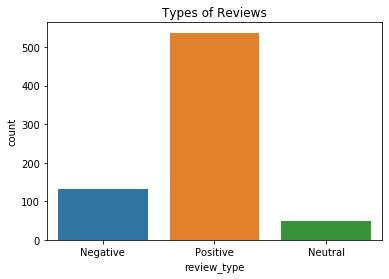

In [232]:
sns.countplot(data['review_type'])
plt.title('Types of Reviews')
plt.show()

In [242]:
pos_reviews=data.loc[data['review_type']=='Positive','clean_reviews'].tolist()
pos_reviews[:5]

['good',
 '1the battery good 5 hour sot normal usage 50 night2device body completely glass corrosion discoloration issue break drop use case3 performance 142 app instal 45 stay memory device 15 gb available ram smooth4 card large phone require anymore cloud storage network speed 64 user live area bot internet infrastructure opt 128 more5 launch july 17 2019 bit skeptical buy 6 month outdate lot search find competitive redmi k30 clear downgrade compare k20',
 'great value product',
 'thumb amazing audio performancethumbs poor camera performance suckpros 1 like rounded edge display view area2 battery backup surprisingly good atleast 2 day 8 hour screen total test 4 g use wifi total3 hi good4 speaker mic pronounced5 device heat demand app quick charging hrs charge 100con instal protector reduce finger print sensor ability quickly unlock delete profile time thing matter sweaty hand rough technology evolve2 facing suck extremely image output big disappointment3 grainy software buggy heavy p

In [243]:
neg_reviews=data.loc[data['review_type']=='Negative','clean_reviews'].tolist()
neg_reviews[:5]

['rate mobile facility poor cemera 48 mp result bad portrait mode nice selfi use long pop hang work properly evan network connectivity price buy appo yah vivo atlist phone good',
 'buy phone bc memory card solt 64 gb low feature',
 'realize thing hard way1 antutu banchmark user experience another2 4000 mah battery necessarily mean good backup os optimized3 bloatware underestimated pain mosquito tease face annoying humm remove helplessness torturous4 day camera quality directly proportional megapixel5 notification light useful that6 non expandable 64 gb troublesome long run pro user7 marketing believe hype buy overpriced mediocre ambition killer',
 'bad product buy guy xiaomi redmi come experience k20 sadly battery life heating problem oneplus',
 'bad phone 27 dec 2019 12 january stop workingno returnnothe happenwhat type os phatthick mi product useless']

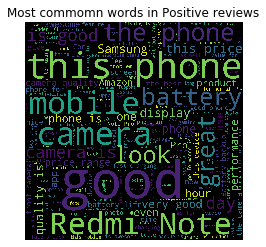

In [237]:
wordcloud=WordCloud(height=3000,width=3000)
wordcloud=wordcloud.generate(' '.join(pos_reviews))
plt.title('Most commomn words in Positive reviews')
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

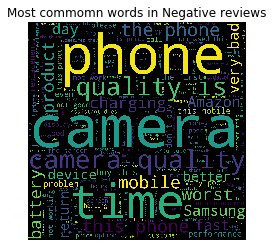

In [238]:
wordcloud=WordCloud(height=3000,width=3000)
wordcloud=wordcloud.generate(' '.join(neg_reviews))
plt.title('Most commomn words in Negative reviews')
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [240]:
from collections import Counter

def MostCommonWords(reviewslist,top_word=20):
    reviews=" ".join(reviewslist)
    token=reviews.split(" ")
    frequency_counter=Counter(token)
    return frequency_counter.most_common(top_word)

In [244]:
most_commom_pos=MostCommonWords(pos_reviews)
most_commom_pos

[('good', 330),
 ('phone', 262),
 ('camera', 255),
 ('battery', 185),
 ('use', 157),
 ('quality', 135),
 ('price', 132),
 ('buy', 124),
 ('like', 117),
 ('day', 102),
 ('look', 102),
 ('display', 101),
 ('charge', 97),
 ('mobile', 95),
 ('product', 94),
 ('redmi', 90),
 ('great', 85),
 ('fast', 81),
 ('performance', 77),
 ('note', 76)]

In [245]:
most_commom_neg=MostCommonWords(neg_reviews)
most_commom_neg

[('phone', 71),
 ('camera', 63),
 ('bad', 61),
 ('quality', 54),
 ('buy', 41),
 ('mobile', 34),
 ('battery', 30),
 ('poor', 29),
 ('work', 28),
 ('time', 26),
 ('problem', 24),
 ('return', 24),
 ('product', 23),
 ('amazon', 23),
 ('screen', 22),
 ('charge', 22),
 ('good', 19),
 ('3', 19),
 ('fast', 19),
 ('day', 18)]

In [270]:
def PlotMostCommon(reviewlist,title,top_word=20,color='blue'):
    words=MostCommonWords(reviewlist,top_word)
    df=pd.DataFrame()
    df['word']=[i[0] for i in words]
    df['frequency']=[i[1] for i in words]
    sns.barplot(x=df['frequency'],y=df['word'],color=color)
    plt.title('Common words'+" "+title)

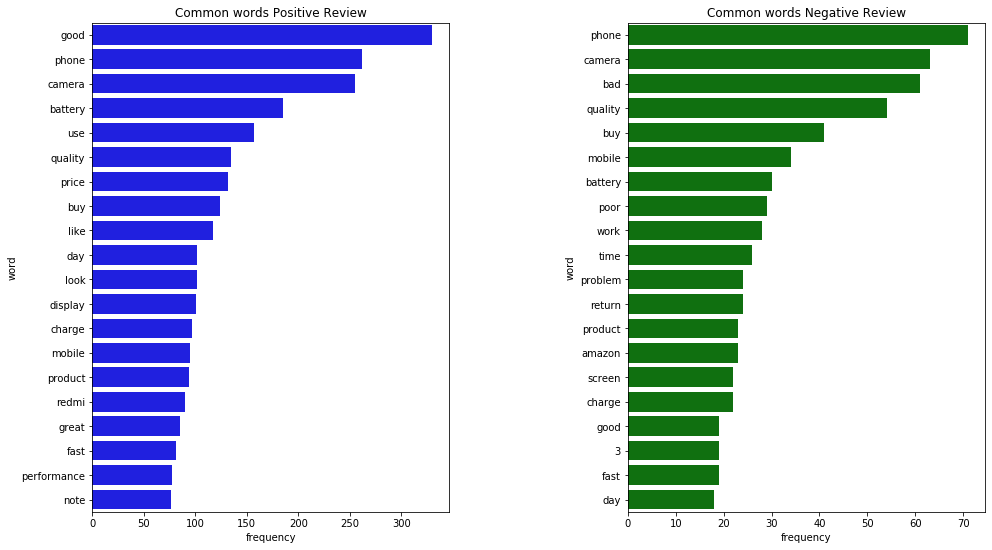

In [275]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.5)
PlotMostCommon(pos_reviews,'Positive Review',20,'blue',)
plt.subplot(1,2,2)
PlotMostCommon(neg_reviews,'Negative Review',20,'green',)
plt.show()